<a href="https://colab.research.google.com/github/theostoican/Guided-Research/blob/main/byol_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

!pip install byol_pytorch
from byol_pytorch import BYOL
from torchvision import models

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT).to(device)
resnet

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
image_size = 512
learner = BYOL(
    resnet,
    image_size = image_size,
    hidden_layer = 'avgpool',
)

opt = torch.optim.Adam(learner.parameters(), lr=3e-4)

In [4]:
from torchvision import transforms

from PIL import Image
import os

preprocess = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ]) 

print(os.listdir('data'))

dataset = []

for filename in sorted(os.listdir('data')):
  img = Image.open(os.path.join('data', filename))
  img = img.convert('RGB')

  img = preprocess(img)

  dataset.append(img)

dataset = torch.stack(dataset).to(device)

dataset_labels = []

for filename in sorted(os.listdir('labels')):
  img = Image.open(os.path.join('labels', filename))
  img = img.convert('RGB')

  img = preprocess(img)

  dataset_labels.append(img)

dataset_labels = torch.stack(dataset_labels).to(device)

['6_00013-color.png', '14_00299-color.png', '5_00007-color.png', '13_00008-color.png', '5_00014-color.png', '8_00002-color.png', '1_00004-color.png', '5_00002-color.png', '8_00011-color.png', '12_00001-color.png', '14_00006-color.png', '6_00004-color.png', '7_00007-color.png', '2_00008-color.png', '6_00008-color.png', '13_00002-color.png', '1_00013-color.png', '8_00007-color.png', '4_00015-color.png', '2_00010-color.png', '8_00009-color.png', '9_00014-color.png', '14_00009-color.png', '1_00002-color.png', '2_00005-color.png', '14_00302-color.png', '10_00013-color.png', '4_00008-color.png', '11_00012-color.png', '1_00015-color.png', '3_00005-color.png', '13_00015-color.png', '13_00004-color.png', '12_00006-color.png', '13_00010-color.png', '9_00011-color.png', '14_00014-color.png', '1_00003-color.png', '10_00003-color.png', '10_00011-color.png', '12_00003-color.png', '2_00006-color.png', '9_00008-color.png', '6_00005-color.png', '9_00002-color.png', '12_00004-color.png', '4_00004-color.

FileNotFoundError: ignored

In [5]:
print(dataset.shape)
print(len(dataset))

print(dataset_labels.shape)

torch.Size([223, 3, 512, 512])
223


AttributeError: ignored

In [47]:
import numpy as np

batch_size = 32
num_batches = np.ceil(len(dataset) / batch_size)

resnet.train()

for epoch in range(200):
  avg_loss = 0
  for batch_idx in np.arange(0, num_batches):
    images = dataset[int(batch_idx * batch_size) : int(np.min([(batch_idx + 1) * batch_size, len(dataset)]))]
    loss = learner(images)
    opt.zero_grad()
    loss.backward()
    opt.step()
    avg_loss += loss.item()
    learner.update_moving_average() # update moving average of target encoder

  avg_loss /= num_batches
  print('Epoch ' + str(epoch) + ' and loss: ' + str(avg_loss))
    # learner.update_moving_average() # update moving average of target encoder

Epoch 0 and loss: 0.05097644403576851
Epoch 1 and loss: 0.13546045131183096
Epoch 2 and loss: 0.1472589817962476
Epoch 3 and loss: 0.11310819563056741
Epoch 4 and loss: 0.065160129884524
Epoch 5 and loss: 0.03994768751519067
Epoch 6 and loss: 0.10631912491018218
Epoch 7 and loss: 0.02255106092031513
Epoch 8 and loss: 0.15363547352275678
Epoch 9 and loss: 0.5010459529502052
Epoch 10 and loss: 0.12474784920258182
Epoch 11 and loss: 0.042609438699270995
Epoch 12 and loss: 0.0729123961978725
Epoch 13 and loss: 0.08341382457209486
Epoch 14 and loss: 0.2079552006907761
Epoch 15 and loss: 0.06038822399984513
Epoch 16 and loss: 0.04101902838530285
Epoch 17 and loss: 0.05903655869354095
Epoch 18 and loss: 0.2354032540294741
Epoch 19 and loss: 0.4947621189057827
Epoch 20 and loss: 0.06368108625922884
Epoch 21 and loss: 0.024406163820198605
Epoch 22 and loss: 0.21253027660506113
Epoch 23 and loss: 0.0821820657168116
Epoch 24 and loss: 0.049000332198504894
Epoch 25 and loss: 0.26463464221784044
Ep

In [67]:
torch.save(resnet.state_dict(), '2000epochs-pretrained-net-2.pt')

# Inference

In [ ]:
resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT).to(device)
resnet.load_state_dict(torch.load('./2000epochs-pretrained-net-2-4.pt', map_location=device))

In [59]:
resnet.eval()
img = Image.open('data/10_00002-color.png')
img = img.convert('RGB')


input = preprocess(img).unsqueeze(0).to(device)
print(input.shape)

torch.Size([1, 3, 512, 512])


In [60]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

resnet.layer4.register_forward_hook(get_activation('attn'))
resnet(input).shape

torch.Size([1, 1000])

In [61]:
from torch import nn

features = activation['attn'][0]
print(features.shape)
num_channels, num_x, num_y = features.shape
features = features.reshape(num_channels, num_x * num_y)
features = features.T.cpu()
nn.functional.normalize(features, p = 2, dim = 1)
print(features.shape)

torch.Size([512, 16, 16])
torch.Size([256, 512])


In [62]:
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
sse = []

for k in range(1, 50):
  kmeans = KMeans(
      init="random",
      n_clusters=k,
      n_init=10,
      max_iter=1000,
      random_state=42)
  labels = kmeans.fit(features)
  sse.append(kmeans.inertia_)

kl = KneeLocator(range(1, 50), sse, curve="convex", direction="decreasing")
print(kl.elbow)

kmeans = KMeans(
      init="random",
      n_clusters=kl.elbow,
      n_init=10,
      max_iter=1000,
      random_state=42)

6


In [64]:
labels = kmeans.fit_predict(features)
print(labels.shape)
labels = labels.reshape(1, num_x, num_y)
print(torch.FloatTensor(labels).shape)

from torch import nn
labels = nn.functional.interpolate(torch.FloatTensor(labels).unsqueeze(0),
                                   size=(image_size, image_size), mode="nearest")[0][0].cpu().numpy()
# labels = labels[0]
print(labels.shape)

(256,)
torch.Size([1, 16, 16])
(512, 512)


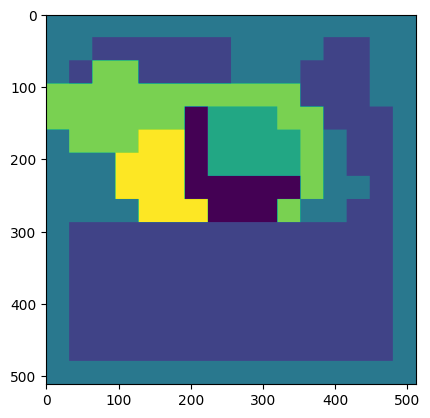

In [65]:
plt.style.use('default')
plt.imshow(labels)

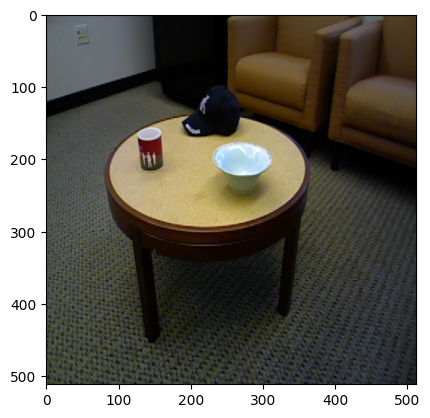

In [66]:
resize_transform = transforms.Resize((image_size, image_size))
plt.imshow(resize_transform(img))

In [63]:
import numpy as np

computed_masks = []

for input_data in dataset:
  # plt.imshow(np.transpose(input_data.cpu(), ((1,2,0))))
  _ = resnet(input_data.unsqueeze(0))
  features = activation['attn'][0]
  num_channels, num_x, num_y = features.shape
  features = features.reshape(num_channels, num_x * num_y)
  features = features.T.cpu()
  nn.functional.normalize(features, p = 2, dim = 1)

  kmeans = KMeans(
      init="random",
      n_clusters=2,
      n_init=10,
      max_iter=1000,
      random_state=42)
  labels = kmeans.fit_predict(features)
  labels = labels.reshape(1, num_x, num_y)

  labels = nn.functional.interpolate(torch.FloatTensor(labels).unsqueeze(0),
                                   size=(image_size, image_size), mode="nearest")[0][0].cpu().numpy()
  labels[labels < 0] = 0
  labels[labels > 0] = 1

  # Revert the mask if "1"s denote the background instead of the main object.
  if len(labels[labels == 1]) > len(labels[labels == 0]):
    labels = 1 - labels

  computed_masks.append(labels)
  # plt.imshow(labels)
  # break

computed_masks = np.array(computed_masks)

In [64]:
print(computed_masks.shape)

(245, 256, 256)


In [72]:
iou = []
for idx, dataset_label in enumerate(dataset_labels):
  if idx > 200:
    # Use only the first channel, since they are similar.
    dataset_label[0][dataset_label[0] < 0] = 0
    dataset_label[0][dataset_label[0] > 0] = 1

    dataset_label = dataset_label[0].cpu().numpy()

    intersection = (np.logical_and(dataset_label, computed_masks[idx])).sum()
    union = (np.logical_or(dataset_label, computed_masks[idx])).sum()
    iou.append(intersection / union)
print(iou)
print(iou[10])
print(np.sum(iou) / len(iou))

[0.5625647668393783, 0.5801828675183192, 0.5845753335502766, 0.5899041283506163, 0.6104575163398693, 0.6190351165080407, 0.6210734277247284, 0.6182116264772184, 0.519826103573476, 0.5625410623136403, 0.5381877502595284, 0.5389301634472511, 0.508133831884621, 0.4672374053342114, 0.4258199327700554, 0.4268454532973319, 0.43047954735182264, 0.47556694183508874, 0.5256232355615101, 0.47947008619591525, 0.4538920645595158, 0.4473030734785264, 0.48265662812584026, 0.4856185745639367, 0.46272028920018077, 0.49485949280328995, 0.43836313417647915, 0.327781528996924, 0.3272187151875232, 0.3354349561053472, 0.3445622945921721, 0.27198561946902655, 0.46596300958652076, 0.33433022673529, 0.3659172126265634, 0.3623258049014897, 0.423773173391494, 0.42948485068662356, 0.4347197106690778, 0.43659118859871227, 0.39544699695543867, 0.404035473110406, 0.4761858286160453, 0.4102450284090909]
0.5381877502595284
0.46582002665178207


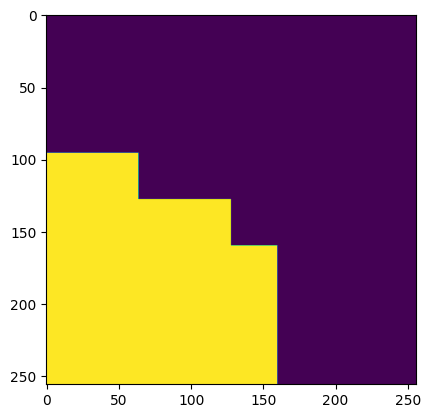

In [40]:
plt.imshow(computed_masks[50])

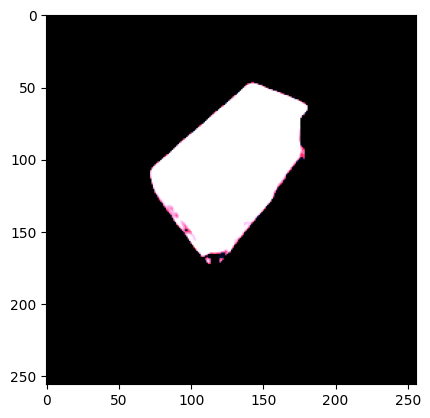

In [41]:
plt.imshow(np.transpose(dataset_labels[50].cpu().numpy(), (1, 2, 0)))

In [25]:
print((np.logical_and(dataset_labels[10][0].cpu().numpy(), computed_masks[10])).sum())
print((np.logical_or(dataset_labels[10][0].cpu().numpy(), computed_masks[10])).sum())
print(len(computed_masks[10][computed_masks[10] > 0]))

7554
31446
25600
